Derived from: https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill.html with slight modifications

# Filled polygon
`fill()` draws a filled polygon based on lists of point coordinates *x,y*.

This example uses the `Koch snowflake` as an example polygon

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

!python --version
print(f'Matplotlib version: {mpl.__version__}')
print(f'Numpy version: {np.__version__}')

Python 3.8.18
Matplotlib version: 3.7.2
Numpy version: 1.24.3


In [14]:
def koch_snowflake(order, scale=10):
    '''
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order: int
        The recursion depth.
    scale: float
        The extent of the snowflake (edge length of the base triangle)
    '''
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3
            p1 = _koch_snowflake_complex(order - 1) # start points
            p2 = np.roll(p1, shift=-1) # end points
            dp = p2 - p1 # connection vectors
            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

Basic usage:

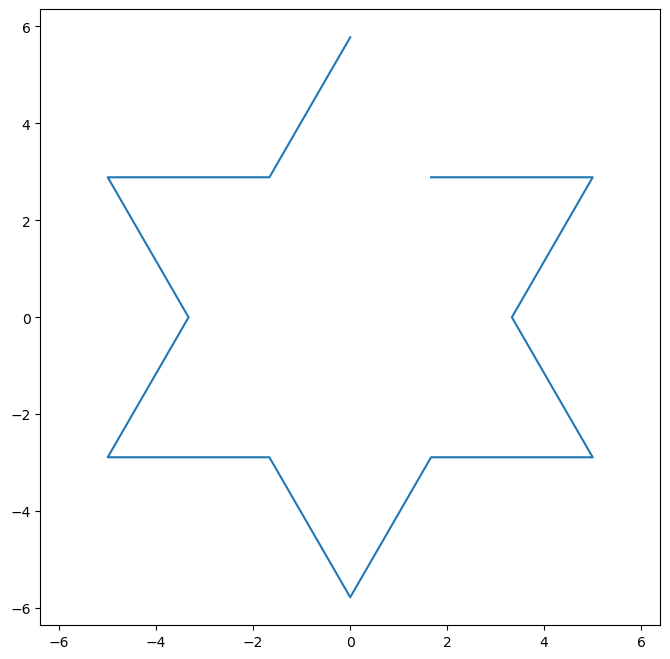

In [29]:
x, y = koch_snowflake(order=1)

plt.figure(figsize=(8,8))
# plt.axis('equal')
# plt.fill(x,y)
plt.plot(x,y)
plt.axis('equal')
plt.show()

In [11]:
print(c.real, c.imag)

[0. 0. 0. 0.] [1. 2. 3. 4.]
